In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("HR dataset.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

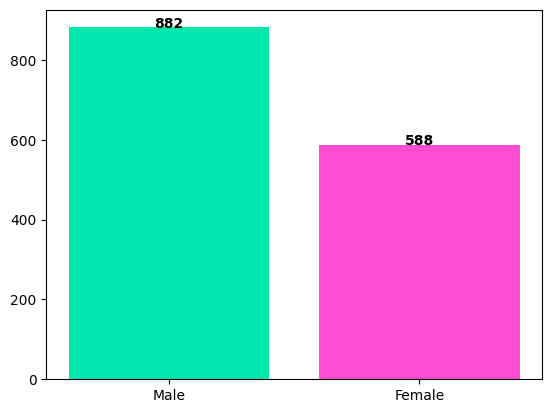

In [3]:
x = df['Gender'].value_counts()
colors = ['#00e6ac', '#ff4dd2']

plt.bar(x.index, x.values, color=colors)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

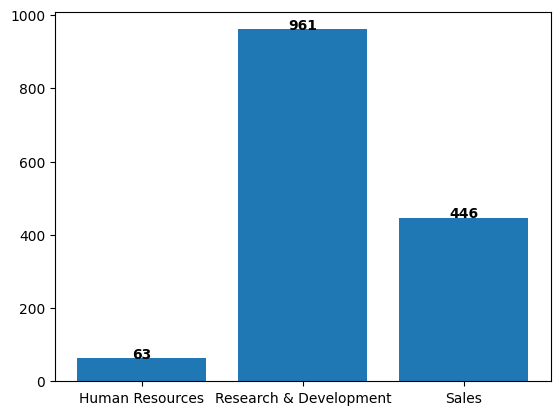

In [4]:
x = df['Gender'].groupby(df['Department']).count()
# colors = ['#4d79ff', '#ff1a75', '#a31aff']

plt.bar(x.index, x.values)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

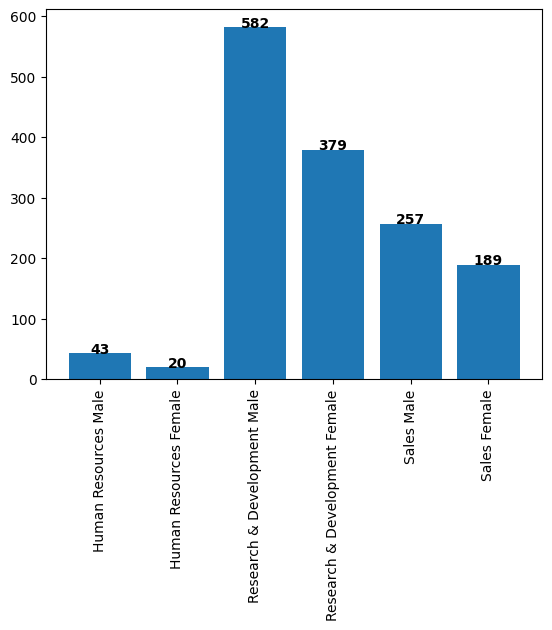

In [5]:
x = df['Gender'].groupby(df['Department']).value_counts()

labels = x.index.map(lambda label: ' '.join(label))

plt.bar(labels, x.values)
plt.xticks(rotation=90)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <BarContainer object of 20 artists>)

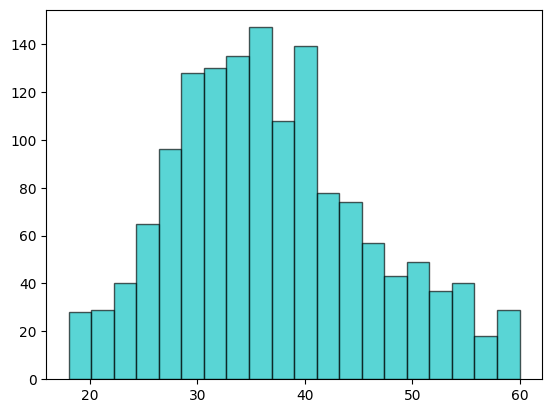

In [6]:
x = df['Age']

plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)

(array([208., 211.,  84.,  64.,  65.,  59.,  84.,  80.,  85.,  86.,  29.,
         20.,  19.,  21.,   0.,  26.,  32.,  20.,  26.,  22.,  25.,  18.,
         19.,  27.,  28.,  25.,  25.,  12.,  23.,  27.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <BarContainer object of 30 artists>)

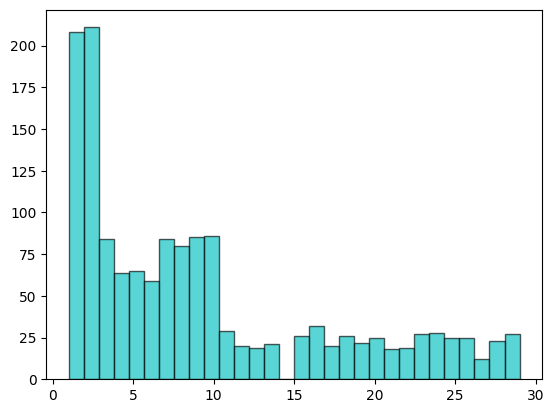

In [7]:
x = df['DistanceFromHome']

plt.hist(x, bins=30, color='c', edgecolor='k', alpha=0.65)

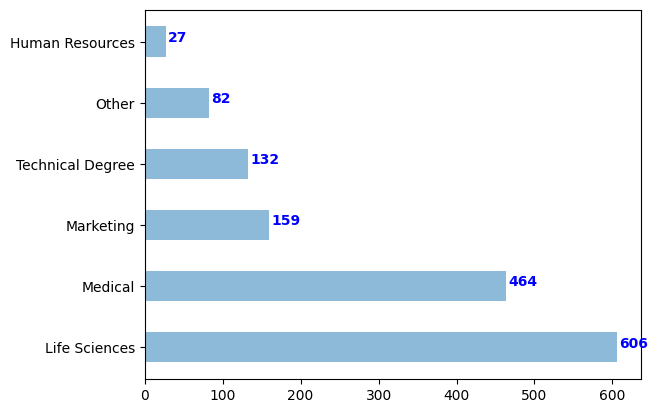

In [8]:
import matplotlib.pyplot as plt

x = df['EducationField'].value_counts()
plt.barh(x.index, x.values, height=0.5, align='center', alpha=0.5)
for i, v in enumerate(x.values):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold')

In [9]:
avgJobSatisfaction = df['JobSatisfaction'].groupby(df['JobRole']).mean().round(2)
print(avgJobSatisfaction)

JobRole
Healthcare Representative    2.79
Human Resources              2.56
Laboratory Technician        2.69
Manager                      2.71
Manufacturing Director       2.68
Research Director            2.70
Research Scientist           2.77
Sales Executive              2.75
Sales Representative         2.73
Name: JobSatisfaction, dtype: float64


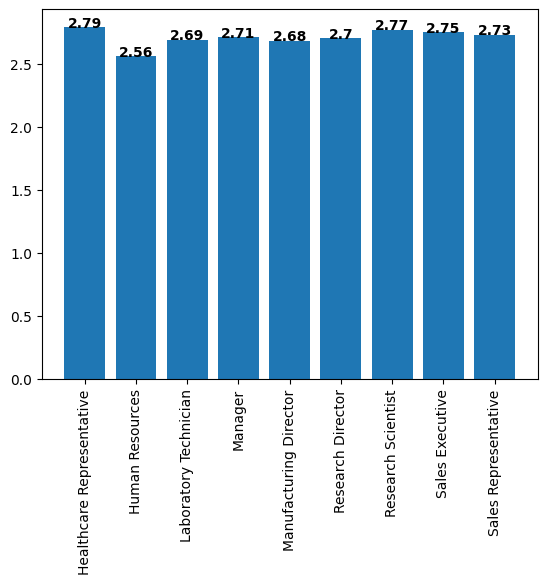

In [10]:
x = df.groupby('JobRole')['JobSatisfaction'].mean().round(2)
plt.bar(x.index, x.values, label='Job Satisfaction')
plt.xticks(rotation=90)
for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

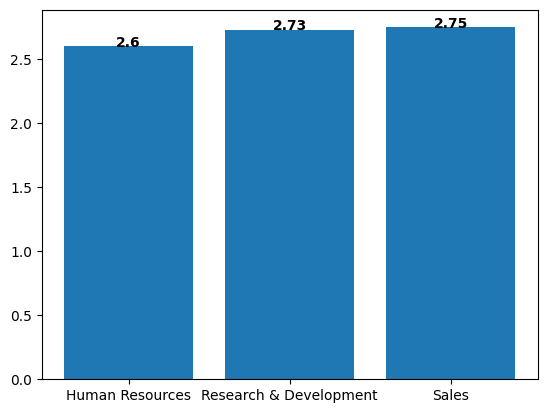

In [11]:
x = df.groupby('Department')['JobSatisfaction'].mean().round(2)
plt.bar(x.index, x.values, label='Job Satisfaction')
for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

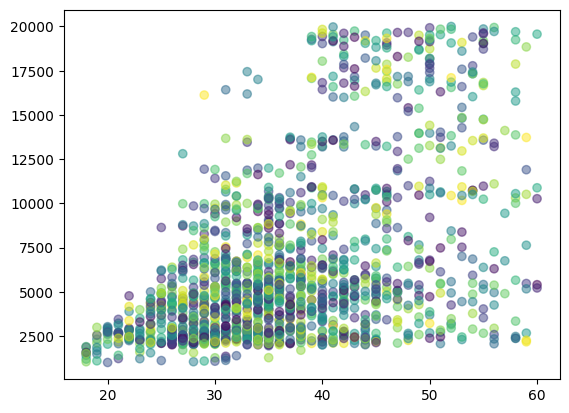

In [29]:
x = df['Age']
y = df['MonthlyIncome']
color = np.random.rand(len(x))

plt.scatter(x, y, alpha=0.5, c=color)

In [31]:
maleAttYes = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')]
print(maleAttYes)

      Age Attrition     BusinessTravel  DailyRate              Department  \
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
2    

In [34]:
maleYesSales = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes') & (df['Department'] == 'Sales')]
print(maleYesSales)

      Age Attrition     BusinessTravel  DailyRate Department  \
21     36       Yes      Travel_Rarely       1218      Sales   
33     39       Yes      Travel_Rarely        895      Sales   
36     50       Yes      Travel_Rarely        869      Sales   
89     46       Yes      Travel_Rarely        669      Sales   
107    25       Yes      Travel_Rarely        240      Sales   
124    31       Yes      Travel_Rarely        249      Sales   
127    19       Yes      Travel_Rarely        528      Sales   
210    32       Yes      Travel_Rarely       1045      Sales   
293    26       Yes      Travel_Rarely        950      Sales   
366    41       Yes  Travel_Frequently        143      Sales   
368    40       Yes      Travel_Rarely        575      Sales   
378    34       Yes         Non-Travel       1362      Sales   
457    18       Yes  Travel_Frequently       1306      Sales   
469    32       Yes         Non-Travel       1474      Sales   
480    30       Yes  Travel_Frequently  

In [33]:
femaleAttYes = df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')]
print(femaleAttYes)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
26     32       Yes  Travel_Frequently       1125  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
102    20       Yes  Travel_Frequently        871  Research & Development   
122    56       Yes      Travel_Rarely        441  Research & Development   
...   ...       ...                ...        ...                     ...   
1298   46       Yes      Travel_Rarely        261  Research & Development   
1333   46       Yes      Travel_Rarely       1254                   Sales   
1369   28       Yes      Travel_Rarely       1475                   Sales   
1375   32       Yes  Travel_Frequently        238  Research & Development   
1379   27       Yes  Travel_Frequently       1337         Human Resources   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0    

In [35]:
femaleNoRD = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'No') & (df['Department'] == 'Research & Development')]
print(femaleNoRD)

      Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
...   ...       ...                ...        ...                     ...   
1463   31        No         Non-Travel        325  Research & Development   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1       

In [55]:
top5MonthlyIncome = df.nlargest(5, 'MonthlyIncome')
selectedColumns = top5MonthlyIncome[['EmployeeNumber','Age','MonthlyIncome','Department']]
print(selectedColumns)

     EmployeeNumber  Age  MonthlyIncome              Department
190             259   52          19999  Research & Development
746            1035   41          19973  Research & Development
851            1191   56          19943  Research & Development
165             226   50          19926  Research & Development
568             787   55          19859  Research & Development
